In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

bloom_df = pd.read_csv('Cyanobacteria2024.csv')
bloom_df = bloom_df.drop(columns='Noted.Location')
bloom_df.columns = bloom_df.columns.str.strip().str.lower().str.replace('.', '_')

bloom_df.groupby(['notification_type', 'dominant_taxa']).size().unstack()

dominant_taxa,"Microcystis, Woronichinia",(Green's Basin),Anabaena,Anabaena/Dolichospermum,"Anabaena/Dolichospermum, Microcystis","Anabaena/Dolichospermum, Microcystis, Aphanizomenon","Anabaena/Dolichospermum, Microcystis, Woronichinia","Anabaena/Dolichospermum, Woronichinia, Oscillatoria",Aphanizomenon,"Aphanizomenon, Chrysosporum, Woronichinia, Phormidium, Dolichospermum",...,"Planktothrix, Woronichinia","Scytonema, Stigonema, Tolypothrix, Lyngbya",Spirulina,Unidentified,Woronichinia,"Woronichinia, Dolichospermum, Microcystis","Woronichinia, Microcystis","Woronichinia, Microcystis, Dolichospermum","Woronichinia, Microcystis, Planktothrix",unidentified
notification_type,,,,,,,,,,,,,,,,,,,,,
Alert,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warning,1.0,NaN,101.0,49.0,2.0,1.0,1.0,1.0,5.0,1.0,...,1.0,1.0,1.0,9.0,4.0,2.0,2.0,3.0,1.0,16.0


In [2]:
pivot = bloom_df.pivot_table(index='lake', columns='notification_type', aggfunc='size', fill_value=0)

In [3]:
bloom_df['date_advisory_issued'] = pd.to_datetime(bloom_df['date_advisory_issued'])
bloom_df['date_advisory_removed'] = pd.to_datetime(bloom_df['date_advisory_removed'])
bloom_df['YearMonth'] = bloom_df['date_advisory_issued'].dt.to_period('M')
bloom_df['year'] = bloom_df['date_advisory_issued'].dt.year
advisory_counts_by_year = bloom_df.groupby('year').size().to_frame()

In [4]:
top_lakes = bloom_df['lake'].value_counts().head(10).index
top_lakes_df = bloom_df[bloom_df['lake'].isin(top_lakes)]

time_series_data = bloom_df[bloom_df['lake'].isin(top_lakes)]

time_series_data['YearMonth'] = time_series_data['date_advisory_issued'].dt.to_period('M')
time_series_data['month'] = time_series_data['date_advisory_issued'].dt.month
aggregated = time_series_data.groupby(['lake', 'YearMonth']).size().reset_index(name='notification_count')

time_series_pivot = aggregated.pivot(index='YearMonth', columns='lake', values='notification_count').fillna(0)

monthly_counts = time_series_data.groupby(['lake', 'month']).size().reset_index(name='monthly_count')

time_series_pivot.index = time_series_pivot.index.to_timestamp()
time_series_pivot = time_series_pivot.resample('M').sum()

C:\Users\curti\AppData\Local\Temp\ipykernel_34844\1792781747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['YearMonth'] = time_series_data['date_advisory_issued'].dt.to_period('M')
C:\Users\curti\AppData\Local\Temp\ipykernel_34844\1792781747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['month'] = time_series_data['date_advisory_issued'].dt.month


In [6]:
bloom_df

,identifier,lake,town,dominant_taxa,total_cell_concentration,date_advisory_issued,date_advisory_removed,advisory_days,auid,notification_type,YearMonth,year
0,Webster.Franklin,Webster Lake,Franklin,unidentified,">70,000 or >50%",2003-09-11,2003-09-26,15.0,NHLAK700010804-02-01,Warning,2003-09,2003
1,Baboosic.Amherst,Baboosic Lake,Amherst,Anabaena,">70,000 or >50%",2004-07-08,2004-09-06,60.0,NHLAK700060905-01-01,Warning,2004-07,2004
2,Greenwood.Kingston,Greenwood Pond,Kingston,Oscillatoria,">70,000 or >50%",2004-07-08,2004-07-23,15.0,NHLAK700061403-07,Warning,2004-07,2004
3,Country.Kingston,Country Pond,"Kingston, Newton",Microcystis,">70,000 or >50%",2004-07-29,2004-08-06,8.0,NHLAK700061403-03-01,Warning,2004-07,2004
4,Robinson.Hudson,Robinson Pond,Hudson,unidentified,">70,000 or >50%",2004-08-18,2004-09-03,16.0,NHLAK700061203-06-01,Warning,2004-08,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
691,Bow.Strafford,Bow Lake,Strafford,Photo,NaN,2023-10-26,2023-11-02,7.0,NHLAK600030604-01-01,Alert,2023-10,2023
692,Warren.Alstead,"Warren, Lake",Alstead,Photo,NaN,2023-10-26,2023-11-02,7.0,NHLAK801070203-01,Alert,2023-10,2023
693,Winni.CenterHarbor,"Winnipesaukee, Lake","Center Harbor, Meredith, Moultonborough",Photo (Blackey Cove),NaN,2023-10-30,2023-12-14,45.0,NHLAK700020110-02-19-6,Alert,2023-10,2023
694,Bow.Strafford,Bow Lake,Strafford,Photo,NaN,2023-11-15,2023-11-22,7.0,NHLAK600030604-01-01,Alert,2023-11,2023


In [33]:
town_count = bloom_df.groupby(['month']).count().reset_index()
hmm = town_count[town_count['notification_type'] >= 20]
hmm

KeyError: 'month'

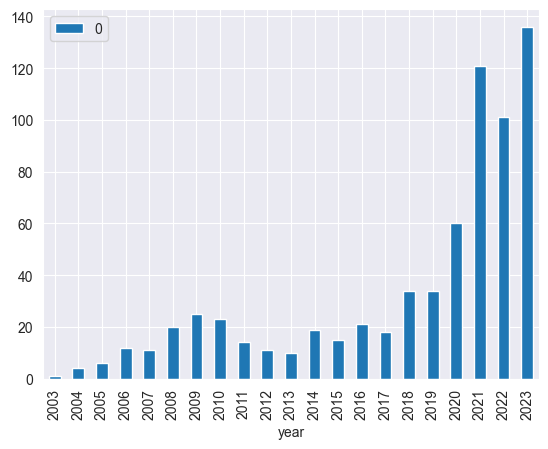

In [5]:
advisory_counts_by_year.plot(kind='bar')
plt.show()

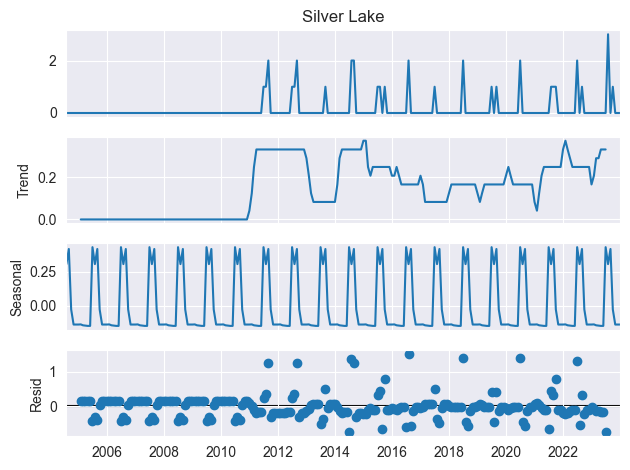

In [23]:
lake = 'Silver Lake'
lake_series = time_series_pivot[lake]
decomposition = seasonal_decompose(lake_series, model='additive', period=12)
decomposition.plot()
plt.show()

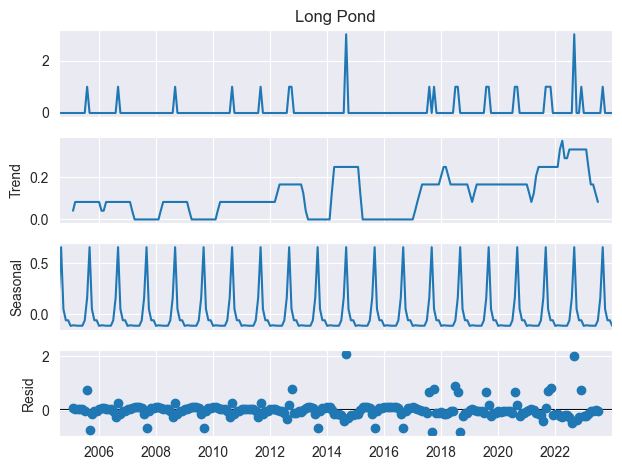

In [24]:
lake = 'Long Pond'
lake_series = time_series_pivot[lake]
decomposition = seasonal_decompose(lake_series, model='additive', period=12)
decomposition.plot()
plt.show()

In [25]:
lake_time_series = (
    bloom_df.groupby(['lake', 'YearMonth'])
    .size().reset_index(name='Notification_Count')
)
lake_time_series_pivot = lake_time_series.pivot(index='YearMonth', columns='lake', values='Notification_Count').fillna(0)
decomposition_results = {}

for lake in lake_time_series_pivot.columns:
    lake_series = lake_time_series_pivot[lake].asfreq('M')  # Ensure regular frequency
    decomposition = seasonal_decompose(lake_series, model='additive', period=12)
    decomposition_results[lake] = decomposition
    
trends = pd.DataFrame({lake: decomposition_results[lake].trend for lake in decomposition_results})
seasonals = pd.DataFrame({lake: decomposition_results[lake].seasonal for lake in decomposition_results})
residuals = pd.DataFrame({lake: decomposition_results[lake].resid for lake in decomposition_results})

max_increase = trends.diff().mean().sort_values(ascending=False)
average_seasonality = seasonals.mean(axis=1)
overall_trend = trends.mean(axis=1)

anomaly_threshold = residuals.std() * 2
anomalies = residuals[abs(residuals) > anomaly_threshold]

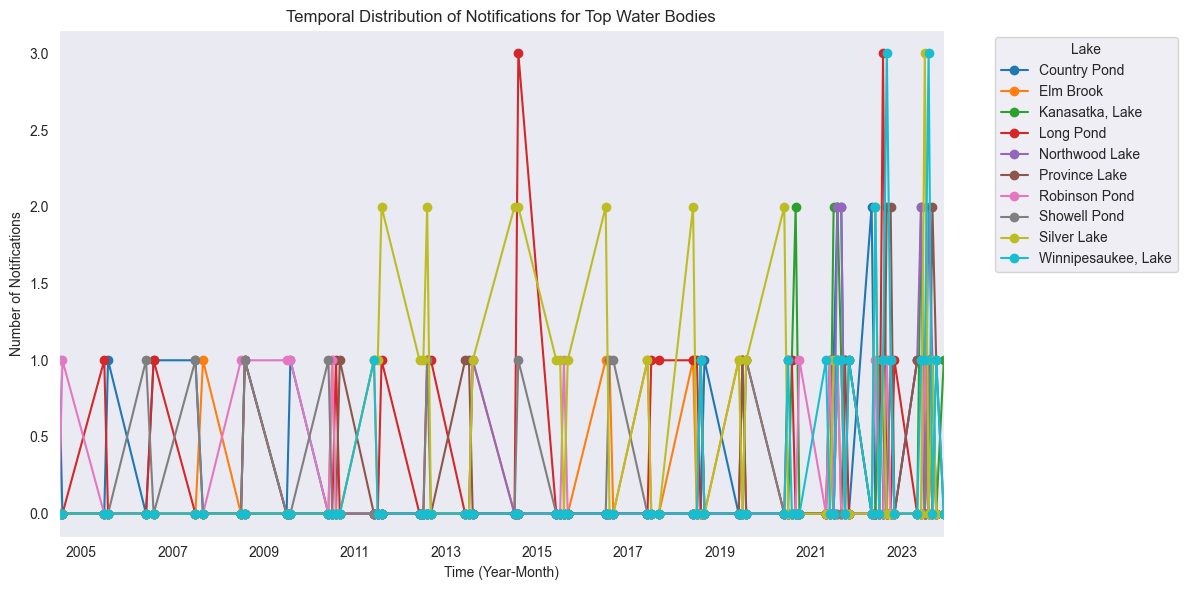

In [26]:
time_series_pivot = aggregated.pivot(index='YearMonth', columns='lake', values='notification_count').fillna(0)
time_series_pivot.plot(figsize=(12, 6), marker='o')
plt.title('Temporal Distribution of Notifications for Top Water Bodies')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Notifications')
plt.legend(title='Lake', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

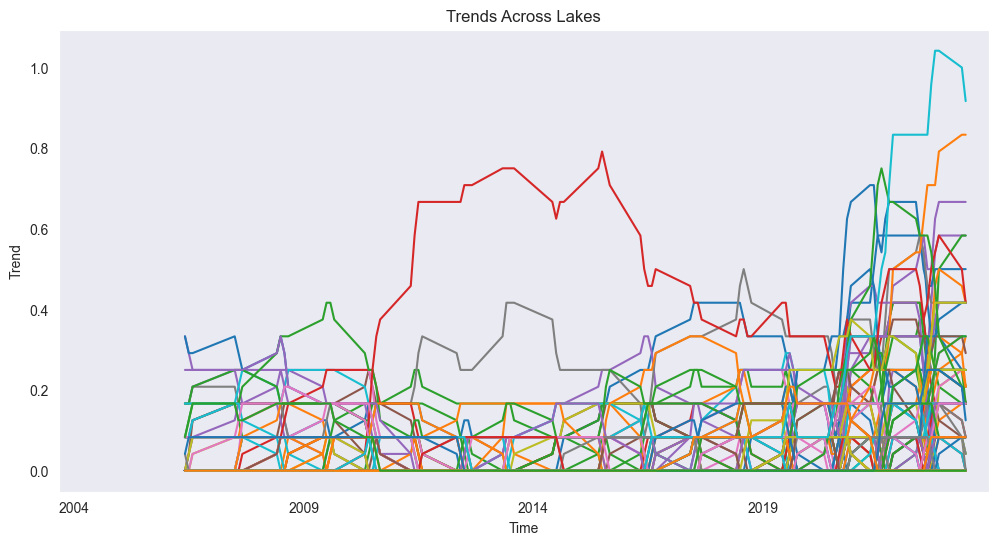

In [27]:
trends.plot(figsize=(12,6), title='Trends Across Lakes', legend=False)
plt.xlabel("Time")
plt.ylabel("Trend")
plt.grid()
plt.show()

In [28]:
max_increase = trends.diff().mean().sort_values(ascending=False)
print(max_increase.head())  # Lakes with fastest increasing trends

Winnipesaukee, Lake    0.011179
Province Lake          0.010163
Northwood Lake         0.008130
Crystal Lake           0.007114
Kanasatka, Lake        0.006098
dtype: float64


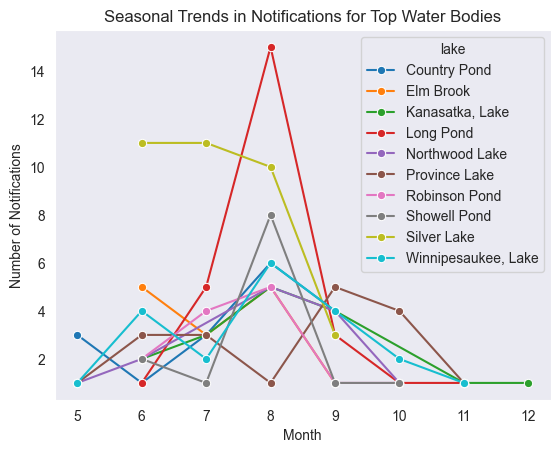

In [29]:
sns.lineplot(data=monthly_counts, x='month', y='monthly_count', hue='lake', marker='o')
plt.title('Seasonal Trends in Notifications for Top Water Bodies')
plt.xlabel('Month')
plt.ylabel('Number of Notifications')
plt.grid()
plt.show()

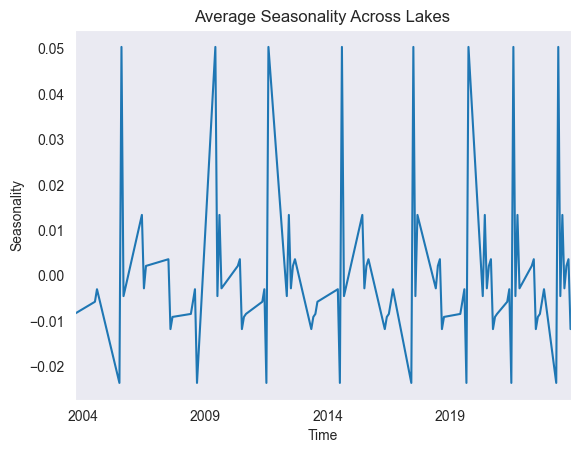

In [30]:
average_seasonality = seasonals.mean(axis=1)
average_seasonality.plot(title="Average Seasonality Across Lakes")
plt.xlabel("Time")
plt.ylabel("Seasonality")
plt.grid()
plt.show()

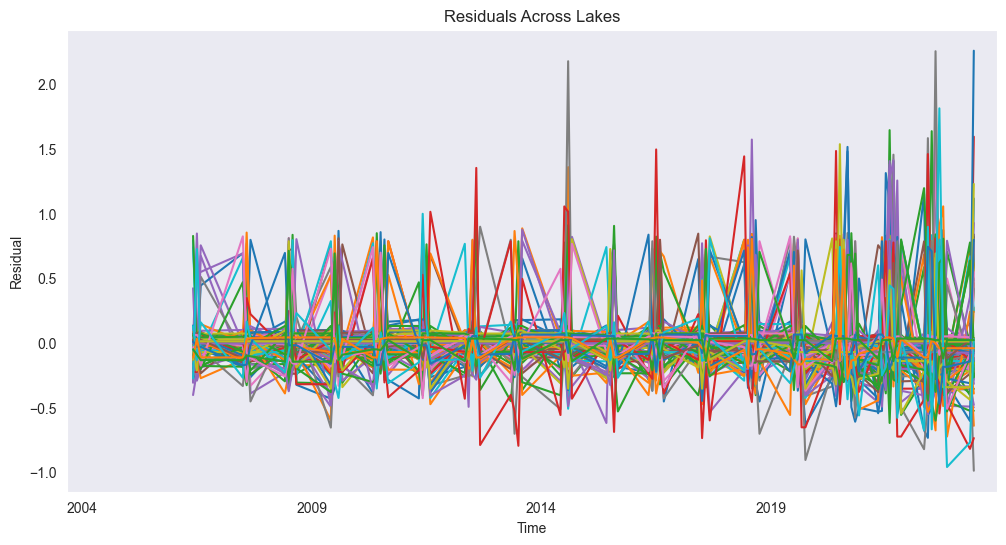

In [31]:
residuals.plot(figsize=(12, 6), title="Residuals Across Lakes", legend=False)
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid()
plt.show()

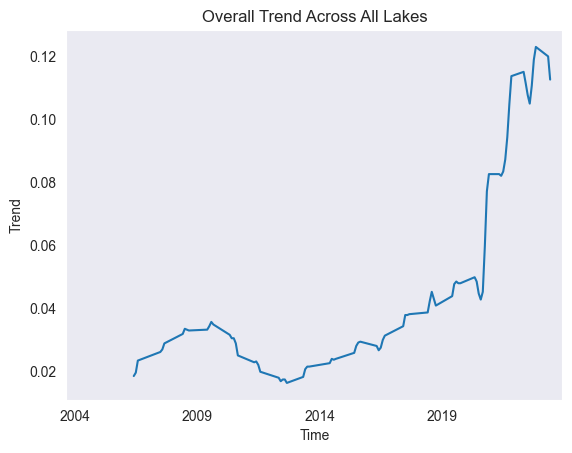

In [32]:
# Calculate overall trend across all lakes
overall_trend.plot(title="Overall Trend Across All Lakes")
plt.xlabel("Time")
plt.ylabel("Trend")
plt.grid()
plt.show()


Mann-Whitney U Test: Statistic = [11.], p-value = [0.00217547]
Statistically significant difference detected.


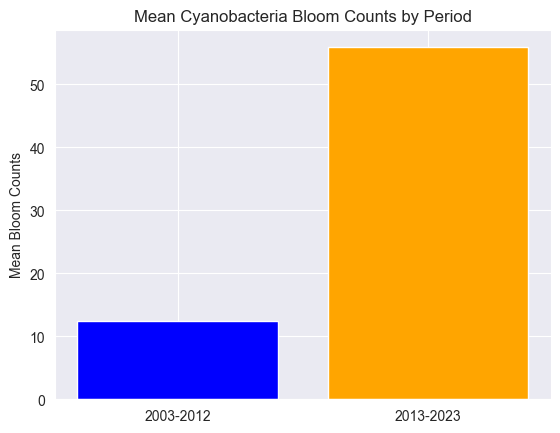

In [56]:
# Split into two periods
period1 = advisory_counts_by_year.loc[2003:2013]
period2 = advisory_counts_by_year.loc[2014:2023]

from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Test for normality
_, p1 = shapiro(period1)
_, p2 = shapiro(period2)

# Choose and apply the test
if p1 > 0.05 and p2 > 0.05:  # Both periods are normally distributed
    test_stat, p_value = ttest_ind(period1, period2)
    test_type = "T-Test"
else:  # At least one period is not normally distributed
    test_stat, p_value = mannwhitneyu(period1, period2)
    test_type = "Mann-Whitney U Test"

# Display results
print(f"{test_type}: Statistic = {test_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Statistically significant difference detected.")
else:
    print("No statistically significant difference detected.")
    
# Calculate mean counts for each period
mean_period1 = period1.mean()
mean_period2 = period2.mean()

# Bar plot
plt.bar(['2003-2012', '2013-2023'], [mean_period1[0], mean_period2[0]], color=['blue', 'orange'])
plt.title('Mean Cyanobacteria Bloom Counts by Period')
plt.ylabel('Mean Bloom Counts')
plt.show()

In [57]:
import numpy as np

# Calculate rank-biserial correlation
U = 11  # Your Mann-Whitney U statistic from earlier
n1 = len(period1)  # Sample size for period1
n2 = len(period2)  # Sample size for period2

r_x = (2 * U) / (n1 * n2) - 1
print(f"Rank-Biserial Correlation: {r_x}")

Rank-Biserial Correlation: -0.8


In [34]:
def clean_name(name):
    # Convert "{name}, Lake" to "Lake {name}"
    if ", Lake" in name:
        name = f"Lake {name.replace(', Lake', '')}"
    # Replace '/' with a single name (arbitrarily choose first name for now)
    if "/" in name:
        if name == 'Adder Pond/Hopkins Pond':
            name = 'Adder Pond'
        elif name == 'Wash Pond/Sunset Lake':
            name = 'Sunset Lake'
    if name == 'Captains Pond':
        name = 'Captain Pond'
    elif name == 'Middle Danforth Pond':
        name = 'Danforth Ponds'
    elif name == 'Otternick Pond':
        name = 'Ottarnic Pond'
    elif name == 'Townhouse Pond':
        name = 'Town House Pond'
    # Remove extra spaces
    return name.strip()

bloom_df['Cleaned_Name'] = bloom_df['lake'].apply(clean_name)

In [35]:
import geopandas as gpd

gdb_path = "nhdplus_epasnapshot2022_nh.gdb"
gdf = gpd.read_file(gdb_path, layer='nhdwaterbody_nh') 
consolidated = gdf.dissolve(by='gnis_name', as_index=False)

C:\Users\curti\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [36]:
merged = bloom_df.merge(consolidated, left_on='Cleaned_Name', right_on='gnis_name', how='left')

In [37]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point

geolocator = Nominatim(user_agent="geoapi")

def geocode(name):
    try:
        location = geolocator.geocode(f"{name}, New Hampshire")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {name}: {e}")
        return None, None

for idx in merged[merged["geometry"].isnull()].index:
    waterbody_name = merged.loc[idx, "Cleaned_Name"]
    latitude, longitude = geocode(waterbody_name)
    
    # If geocoding was successful, update the corresponding row with the new geometry
    if latitude and longitude:
        merged.loc[idx, "geometry"] = Point(longitude, latitude)  # Update geometry column


In [38]:
print(merged[merged['geometry'].isnull()])

            identifier                       lake     town  \
100        Surry.Surry   Surry Mountain Reservoir    Surry   
127  WhitePark.Concord            White Park Pond  Concord   
228   MineFalls.Nashua  Nashua River (Mine Falls)   Nashua   

                 dominant_taxa      total_cell_concentration  \
100               unidentified               >70,000 or >50%   
127                   Anabaena                       >70,000   
228  Oscillatoria/Planktothrix  too numerous to count (TNTC)   

    date_advisory_issued date_advisory_removed  advisory_days  \
100           2010-09-02            2010-09-30           28.0   
127           2013-05-28            2013-05-31            3.0   
228           2018-08-08            2018-08-28           20.0   

                     auid notification_type  ... gnis_id  areasqkm elevation  \
100  NHLAK802010104-02-01           Warning  ...     NaN       NaN       NaN   
127     NHLAK700060302-20           Warning  ...     NaN       NaN       

In [39]:
"""for idx in uhoh[uhoh["geometry"].isnull()].index:
    waterbody_name = uhoh.loc[idx, "Cleaned_Name"]
    latitude, longitude = geocode(waterbody_name)
    
    print(f"Geocoded {waterbody_name}: {latitude}, {longitude}")
    
    # If geocoding was successful, update the corresponding row with the new geometry
    if latitude and longitude:
        print(idx)
        uhoh.loc[idx, "geometry"] = Point(longitude, latitude) # Update geometry column
        print(uhoh.loc[idx, "geometry"])"""

'for idx in uhoh[uhoh["geometry"].isnull()].index:\n    waterbody_name = uhoh.loc[idx, "Cleaned_Name"]\n    latitude, longitude = geocode(waterbody_name)\n    \n    print(f"Geocoded {waterbody_name}: {latitude}, {longitude}")\n    \n    # If geocoding was successful, update the corresponding row with the new geometry\n    if latitude and longitude:\n        print(idx)\n        uhoh.loc[idx, "geometry"] = Point(longitude, latitude) # Update geometry column\n        print(uhoh.loc[idx, "geometry"])'

In [40]:
merged

,identifier,lake,town,dominant_taxa,total_cell_concentration,date_advisory_issued,date_advisory_removed,advisory_days,auid,notification_type,...,gnis_id,areasqkm,elevation,reachcode,ftype,fcode,visibilityfilter,nhdplusid,vpuid,GlobalID
0,Webster.Franklin,Webster Lake,Franklin,unidentified,">70,000 or >50%",2003-09-11,2003-09-26,15.0,NHLAK700010804-02-01,Warning,...,00870704,2.452755,121.9,01070001001269,390.0,39009.0,0.0,5.000900e+12,0107,{75C50E46-CCD8-490C-8CC8-0C4FA6162398}
1,Baboosic.Amherst,Baboosic Lake,Amherst,Anabaena,">70,000 or >50%",2004-07-08,2004-09-06,60.0,NHLAK700060905-01-01,Warning,...,00865300,0.924745,70.7,01070006001508,390.0,39009.0,0.0,5.000900e+12,0107,{B974C8F9-2DC7-44BF-B1AF-FFFC6B5CEC4E}
2,Greenwood.Kingston,Greenwood Pond,Kingston,Oscillatoria,">70,000 or >50%",2004-07-08,2004-07-23,15.0,NHLAK700061403-07,Warning,...,00867252,0.203449,37.8,01070006009806,390.0,39009.0,0.0,5.000900e+12,0107,{E270ACB8-F53F-429F-9F35-A38AC66FF660}
3,Country.Kingston,Country Pond,"Kingston, Newton",Microcystis,">70,000 or >50%",2004-07-29,2004-08-06,8.0,NHLAK700061403-03-01,Warning,...,00866366,1.238238,35.4,01070006001511,390.0,39009.0,0.0,5.000900e+12,0107,{9FE6FA4B-A00C-4B2A-9C27-4421793D921A}
4,Robinson.Hudson,Robinson Pond,Hudson,unidentified,">70,000 or >50%",2004-08-18,2004-09-03,16.0,NHLAK700061203-06-01,Warning,...,00869547,0.520292,65.5,01070006001562,390.0,39009.0,0.0,5.000900e+12,0107,{F8AC8D9A-1DC6-4189-A5BF-5BE6FBA16418}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Bow.Strafford,Bow Lake,Strafford,Photo,NaN,2023-10-26,2023-11-02,7.0,NHLAK600030604-01-01,Alert,...,00865729,4.614118,NaN,01060003002322,390.0,39004.0,0.0,5.000600e+12,0106,{25579A58-9382-469C-B6CD-2C531E50876D}
692,Warren.Alstead,"Warren, Lake",Alstead,Photo,NaN,2023-10-26,2023-11-02,7.0,NHLAK801070203-01,Alert,...,00870672,0.789654,366.0,01080107003368,390.0,39009.0,0.0,1.000090e+13,0108,{3FE26F1B-6E45-43D5-BBFF-0AA8F5DB66B0}
693,Winni.CenterHarbor,"Winnipesaukee, Lake","Center Harbor, Meredith, Moultonborough",Photo (Blackey Cove),NaN,2023-10-30,2023-12-14,45.0,NHLAK700020110-02-19-6,Alert,...,00870958,184.756533,153.6,01070002002868,390.0,39009.0,0.0,5.000900e+12,0107,{15199C88-7CD3-4421-ACC5-C827FCFECF8B}
694,Bow.Strafford,Bow Lake,Strafford,Photo,NaN,2023-11-15,2023-11-22,7.0,NHLAK600030604-01-01,Alert,...,00865729,4.614118,NaN,01060003002322,390.0,39004.0,0.0,5.000600e+12,0106,{25579A58-9382-469C-B6CD-2C531E50876D}


In [41]:
geometry_types = merged.geometry.apply(lambda geom: geom.geom_type if geom else None)
geometry_counts = geometry_types.value_counts()
print(geometry_counts)

geometry
Polygon         448
MultiPolygon    170
Point            75
Name: count, dtype: int64


In [42]:
merged = merged[merged.geometry.notnull()].copy()

In [43]:
merged[merged['geometry'].isnull()]

,identifier,lake,town,dominant_taxa,total_cell_concentration,date_advisory_issued,date_advisory_removed,advisory_days,auid,notification_type,...,gnis_id,areasqkm,elevation,reachcode,ftype,fcode,visibilityfilter,nhdplusid,vpuid,GlobalID


In [44]:
merged_gdf = gpd.GeoDataFrame(merged, geometry=merged['geometry'], crs="EPSG:4326")

In [45]:
merged_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
merged_gdf = merged_gdf.to_crs("EPSG:3857")

In [47]:
invalid_geometries = gdf[~gdf.is_valid]
print(f'Number of invalid geometries: {len(invalid_geometries)}')

Number of invalid geometries: 0


In [48]:
merged_gdf.loc[merged_gdf.geometry.geom_type == 'Point', 'geometry'] = (merged_gdf[merged_gdf.geometry.geom_type == 'Point'].geometry.buffer(1))

In [49]:
merged_gdf = merged_gdf.to_crs("EPSG:4326")

In [50]:
merged_gdf.to_file('cyanobacteria_geocoded_full4.gpkg', driver='GPKG')

In [51]:
merged_gdf = merged_gdf.to_crs("EPSG:3857")

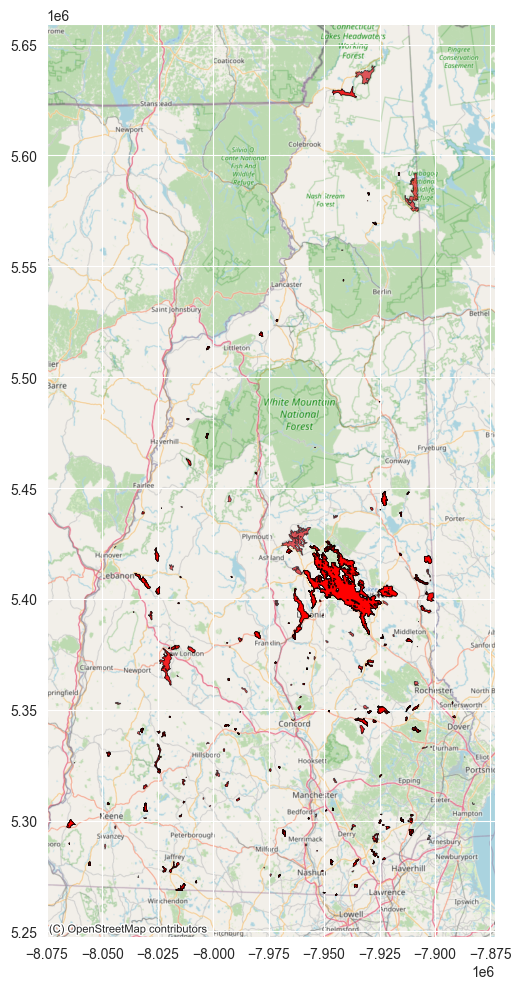

In [52]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(ax=ax, color='red', alpha=0.6, edgecolor='black', linewidth=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs="EPSG: 3857")
plt.tight_layout()
plt.show()